# Creating and analyzing the dataset

BIBLIOGRAPHY:


https://cwjshen.github.io/predicting-stocks/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
appl = pd.read_csv("hf://datasets/tablegpt/AppleStockData2025/apple_stock.csv")

In [3]:
appl = appl.set_index(['Unnamed: 0'])

In [4]:
appl.index.name = 'date'
appl.index = pd.to_datetime(appl.index)

In [5]:
# Using only the last 11 years
cutoff_date = pd.Timestamp.today() - pd.DateOffset(years=11)
appl_last = appl[appl.index >= cutoff_date]
appl_last

,Adj Close,Close,High,Low,Open,Volume
date,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400
...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


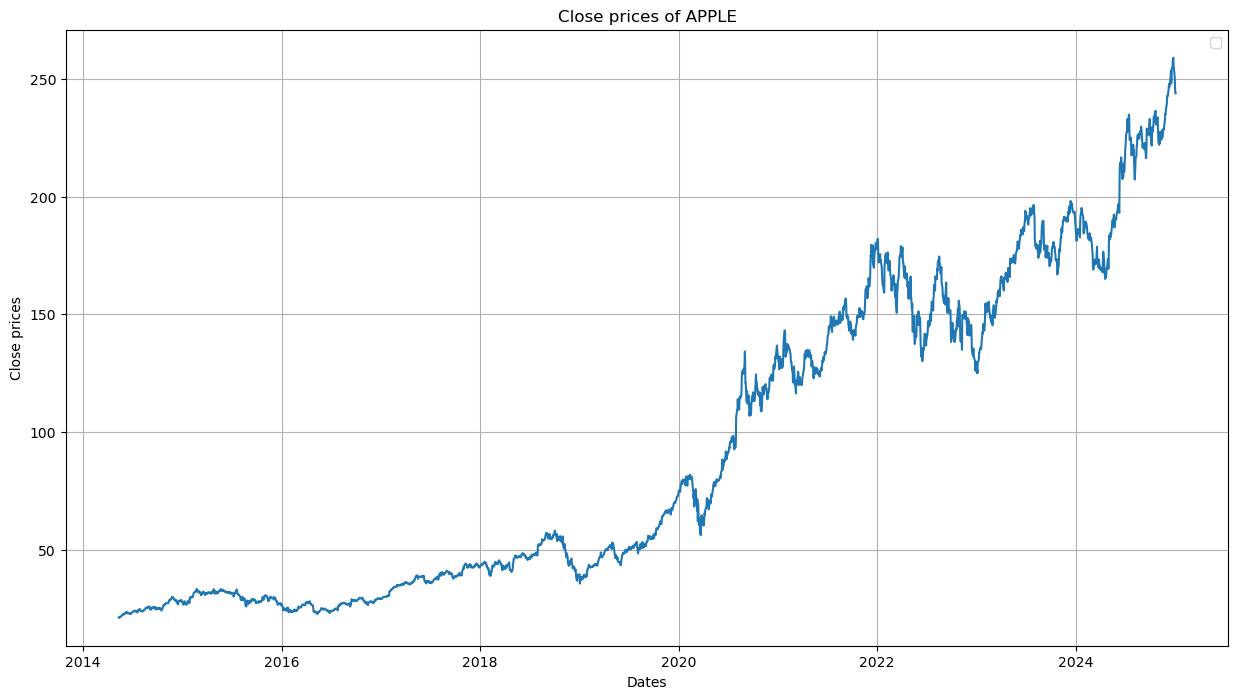

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(appl_last.index, appl_last['Close'])
plt.xlabel('Dates')
plt.ylabel('Close prices')
plt.title('Close prices of APPLE')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
appl_last['last_close'] = appl_last['Close'].shift(1)
appl_last

C:\Users\user\AppData\Local\Temp\ipykernel_16712\3417538644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_last['last_close'] = appl_last['Close'].shift(1)


,Adj Close,Close,High,Low,Open,Volume,last_close
date,,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285
...,...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997


In [8]:
appl_last['delta_close'] = appl_last['Close'] - appl_last['last_close']
appl_last

C:\Users\user\AppData\Local\Temp\ipykernel_16712\1785336575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_last['delta_close'] = appl_last['Close'] - appl_last['last_close']


,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close
date,,,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358
...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


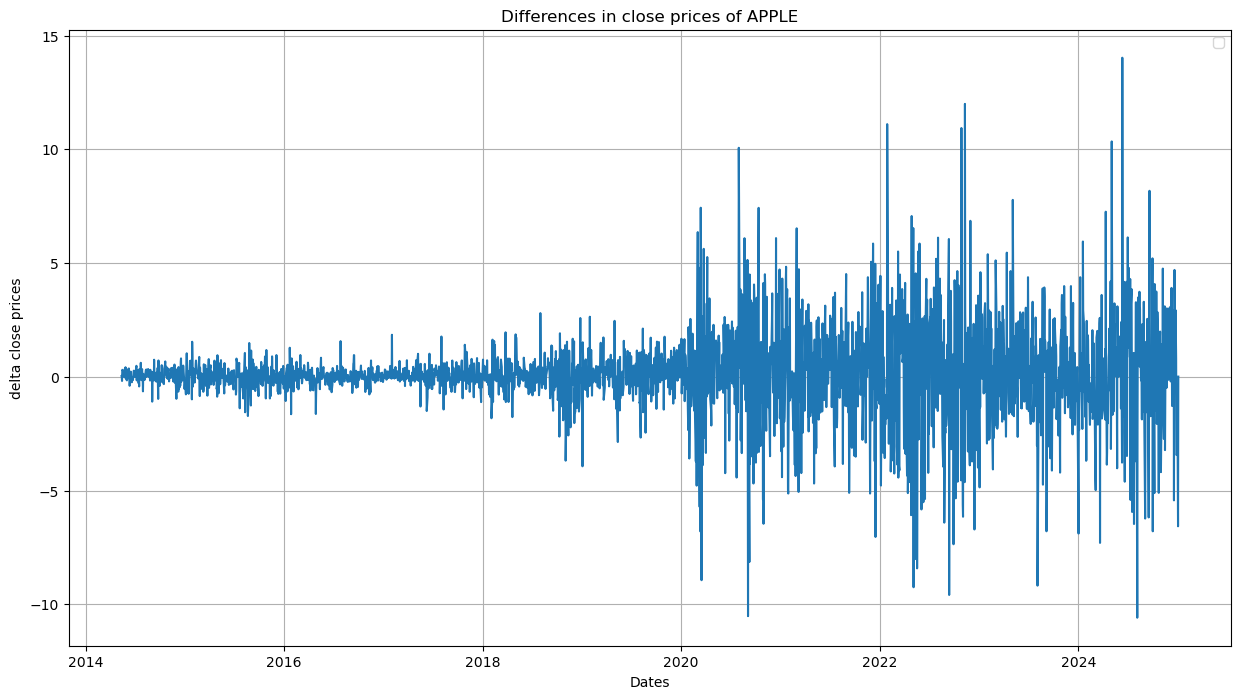

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(appl_last.index, appl_last['delta_close'])
plt.xlabel('Dates')
plt.ylabel('delta close prices')
plt.title('Differences in close prices of APPLE')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
appl_last['direction'] = (appl_last['delta_close'] >= 0)
appl_last['direction'] = appl_last['direction'].astype(int)
appl_last

C:\Users\user\AppData\Local\Temp\ipykernel_16712\1606963879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_last['direction'] = (appl_last['delta_close'] >= 0)
C:\Users\user\AppData\Local\Temp\ipykernel_16712\1606963879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_last['direction'] = appl_last['direction'].astype(int)


,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction
date,,,,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN,0
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213,1
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929,1
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357,0
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358,1
...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993,0
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999,0
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999,0


In [ ]:
#appl_last.to_csv("datasets/apple_2014-2024.csv")

# Adding financial features to the dataset

In [13]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("datasets/apple_2014-2024.csv")
df

,date,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction
0,2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN,0
1,2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213,1
2,2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929,1
3,2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357,0
4,2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358,1
...,...,...,...,...,...,...,...,...,...,...
2676,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993,0
2677,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999,0
2678,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999,0
2679,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,250.419998,-6.569992,0


In [16]:
# Calculats the Relative Strenght Index (RSI)
def calc_rsi(df, horizons=[14]):
    new_df = df.copy()
    for horizon in horizons:
        name = f"RSI_{horizon}"
        new_df[name] = ta.rsi(new_df['Close'], length=horizon)
    return new_df

# Calculates the Simple Moving Average (SMA)
def calc_sma(df, horizons=[5,10,20,50,100]):
    new_df = df.copy()
    for horizon in horizons:
        name = f"SMA_{horizon}"
        new_df[name] = ta.sma(new_df['Close'], length=horizon)
    return new_df
        
# Calculates the Exponential Moving Average (EMA)
def calc_ema(df, horizons=[20,50,100]):
    new_df = df.copy()
    for horizon in horizons:
        name = f"EMA_{horizon}"
        new_df[name] = ta.ema(new_df['Close'], length=horizon)
    return new_df

# Calculates Moving Average Convergence/Divergence (MACD)
def calc_macd(df, signal=True):
    new_df = df.copy()
    new_df['MACD'] = ta.macd(new_df['Close'])['MACD_12_26_9']
    if (signal):
        new_df['MACD_Signal'] = ta.macd(new_df['Close'])['MACDs_12_26_9']
    return new_df

# Calculates upper and lower bollinger bands
def calc_bollinger_bands(df, horizons=[20]):
    new_df = df.copy()
    for horizon in horizons:
        bbands = ta.bbands(new_df['Close'], length=horizon)
        upper = f"BBU_{horizon}_2.0"
        lower = f"BBL_{horizon}_2.0"
        new_df[upper] = bbands[upper]
        new_df[lower] = bbands[lower]
    return new_df

# Calculates momentum
def calc_momentum(df, horizons=[10]):
    new_df = df.copy()
    for horizon in horizons:
        name = f"momentum_{horizon}"
        new_df[name] = ta.mom(new_df['Close'], length=horizon)
    return new_df

#Calsulates Average True Range (ATR)
def calc_atr(df, horizons=[14]):
    new_df = df.copy()
    for horizon in horizons:
        name = f"ATR_{horizon}"
        new_df[name] = ta.atr(new_df['High'], new_df['Low'], new_df['Close'], length=horizon)
    return new_df

def calc_all_default(df):
    new_df = df.copy()
    new_df = calc_rsi(new_df)
    new_df = calc_sma(new_df)
    new_df = calc_ema(new_df)
    new_df = calc_macd(new_df)
    new_df = calc_bollinger_bands(new_df)
    new_df = calc_momentum(new_df)
    new_df = calc_atr(new_df)
    return new_df
    


In [17]:
df = calc_rsi(df)
df = calc_sma(df)
df = calc_ema(df)
df = calc_macd(df)
df = calc_bollinger_bands(df)
df = calc_momentum(df)
df = calc_atr(df)
df

,date,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction,...,SMA_100,EMA_20,EMA_50,EMA_100,MACD,MACD_Signal,BBU_20_2.0,BBL_20_2.0,momentum_10,ATR_14
0,2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993,0,...,230.7714,248.590801,239.832882,231.235046,6.126376,5.667139,260.426425,236.622574,7.629990,4.079470
2677,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999,0,...,231.1952,248.934534,240.317867,231.650193,5.659474,5.665606,260.088496,238.447502,4.069992,4.133794
2678,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999,0,...,231.5663,249.076007,240.714029,232.021872,5.087179,5.549921,259.680818,239.938180,-0.619995,4.113523
2679,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,250.419998,-6.569992,0,...,231.8424,248.578292,240.837008,232.256093,4.056724,5.251281,259.579286,240.159714,-9.629990,4.433985


In [19]:
# Correcting the index
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)
df['week_day'] = df.index.day_name()
df

,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction,RSI_14,...,EMA_20,EMA_50,EMA_100,MACD,MACD_Signal,BBU_20_2.0,BBL_20_2.0,momentum_10,ATR_14,week_day
date,,,,,,,,,,,,,,,,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993,0,67.575020,...,248.590801,239.832882,231.235046,6.126376,5.667139,260.426425,236.622574,7.629990,4.079470,Friday
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999,0,60.185319,...,248.934534,240.317867,231.650193,5.659474,5.665606,260.088496,238.447502,4.069992,4.133794,Monday
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999,0,56.680397,...,249.076007,240.714029,232.021872,5.087179,5.549921,259.680818,239.938180,-0.619995,4.113523,Tuesday


In [21]:
# Defining possible targets for each row
df['next_close'] = df['Close'].shift(-1)
df['next_delta_close'] = df['delta_close'].shift(-1)
df[['Close', 'next_close', 'delta_close', 'next_delta_close']]

,Close,next_close,delta_close,next_delta_close
date,,,,
2014-05-12,21.172501,21.205713,NaN,0.033213
2014-05-13,21.205713,21.209642,0.033213,0.003929
2014-05-14,21.209642,21.029285,0.003929,-0.180357
2014-05-15,21.029285,21.339643,-0.180357,0.310358
2014-05-16,21.339643,21.592501,0.310358,0.252857
...,...,...,...,...
2024-12-27,255.589996,252.199997,-3.429993,-3.389999
2024-12-30,252.199997,250.419998,-3.389999,-1.779999
2024-12-31,250.419998,243.850006,-1.779999,-6.569992


In [30]:
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['week_day_num'] = df['week_day'].map(day_map)

df[['week_day', 'week_day_num']]

,week_day,week_day_num
date,,
2014-05-12,Monday,0
2014-05-13,Tuesday,1
2014-05-14,Wednesday,2
2014-05-15,Thursday,3
2014-05-16,Friday,4
...,...,...
2024-12-27,Friday,4
2024-12-30,Monday,0
2024-12-31,Tuesday,1


In [ ]:
# Saving the dataframe
# df.to_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")

# XGBmodels

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)
df

,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction,RSI_14,...,MACD,MACD_Signal,BBU_20_2.0,BBL_20_2.0,momentum_10,ATR_14,week_day,next_close,next_delta_close,week_day_num
date,,,,,,,,,,,,,,,,,,,,,
2014-05-12,18.685608,21.172501,21.202143,20.978571,20.981787,213208800,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Monday,21.205713,0.033213,0
2014-05-13,18.714922,21.205713,21.233570,21.096430,21.142857,159737200,21.172501,0.033213,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,21.209642,0.003929,1
2014-05-14,18.718393,21.209642,21.335714,21.133572,21.158215,166404000,21.205713,0.003929,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,21.029285,-0.180357,2
2014-05-15,18.559217,21.029285,21.307142,21.001429,21.239286,230846000,21.209642,-0.180357,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,21.339643,0.310358,3
2014-05-16,18.833124,21.339643,21.340357,20.907143,21.022499,276256400,21.029285,0.310358,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Friday,21.592501,0.252857,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,259.019989,-3.429993,0,67.575020,...,6.126376,5.667139,260.426425,236.622574,7.629990,4.079470,Friday,252.199997,-3.389999,4
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,255.589996,-3.389999,0,60.185319,...,5.659474,5.665606,260.088496,238.447502,4.069992,4.133794,Monday,250.419998,-1.779999,0
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,252.199997,-1.779999,0,56.680397,...,5.087179,5.549921,259.680818,239.938180,-0.619995,4.113523,Tuesday,243.850006,-6.569992,1


In [40]:
df = df.dropna()
target_linear_close = df['next_close']
target_linear_delta = df['next_delta_close']

input_linear = df[['Close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

In [44]:
split_index = int(len(input_linear) * 0.8)

X_train_linear = input_linear.iloc[:split_index]
X_test_linear = input_linear.iloc[split_index:]

y_train_linear_close = target_linear_close.iloc[:split_index]
y_test_linear_close = target_linear_close.iloc[split_index:]

y_train_linear_delta = target_linear_delta.iloc[:split_index]
y_test_linear_delta = target_linear_delta.iloc[split_index:]


## Creating XGB Models

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def model_scores(y_true, y_pred, verbose=True):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.clip(np.array(y_true), 1e-8, None))) * 100
    r2 = r2_score(y_true, y_pred)

    results = {
        'MAE': mae, # Mean Absolute Error
        'RMSE': rmse, # Root Mean Squared Error
        'MAPE (%)': mape, # Mean Absolute Percentage Error
        'R²': r2 # R2 Score
    }

    if verbose:
        for k, v in results.items():
            print(f'{k}: {v:.4f}')

    return results


In [25]:
import matplotlib.pyplot as plt

def plot_predictions(y_full, y_pred_train, y_pred_test, title, figsize=(16, 8)):
    plt.figure(figsize=figsize)
    plt.plot(y_full, label='Real Values', color='blue')
    plt.plot(y_pred_train, label='Train Predictions', color='green')
    plt.plot(y_pred_test, label='Test Predictions', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()  
    

In [57]:
# Models Creation

model_close = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='rmse',
    random_state=42
)

model_delta = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='rmse',
    early_stopping_rounds=10,
    random_state=42
)

## Close predictions

In [58]:
# Close prediction training

model_close.fit(
    X_train_linear, y_train_linear_close,
    eval_set=[(X_test_linear, y_test_linear_close)],
    verbose=True
)

[0]	validation_0-rmse:119.21927
[1]	validation_0-rmse:117.41829
[2]	validation_0-rmse:115.68580
[3]	validation_0-rmse:113.98015
[4]	validation_0-rmse:112.30302
[5]	validation_0-rmse:110.66541
[6]	validation_0-rmse:109.06215
[7]	validation_0-rmse:107.48657
[8]	validation_0-rmse:105.95652
[9]	validation_0-rmse:104.44896
[10]	validation_0-rmse:102.96730
[11]	validation_0-rmse:101.50695
[12]	validation_0-rmse:100.09718
[13]	validation_0-rmse:98.69958
[14]	validation_0-rmse:97.33082
[15]	validation_0-rmse:96.01834
[16]	validation_0-rmse:94.66491
[17]	validation_0-rmse:93.34359
[18]	validation_0-rmse:92.06899
[19]	validation_0-rmse:90.84722
[20]	validation_0-rmse:89.62575
[21]	validation_0-rmse:88.40738
[22]	validation_0-rmse:87.26704
[23]	validation_0-rmse:86.09897
[24]	validation_0-rmse:84.92231
[25]	validation_0-rmse:83.77820
[26]	validation_0-rmse:82.68114
[27]	validation_0-rmse:81.62733
[28]	validation_0-rmse:80.57326
[29]	validation_0-rmse:79.53791
[30]	validation_0-rmse:78.50481
[31]	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred_TrainClose = model_close.predict(X_train_linear)
y_pred_TestClose = model_close.predict(X_test_linear)

In [74]:
train_ClosePredictions = pd.DataFrame(y_train_linear_close)
train_ClosePredictions['pred'] = y_pred_TrainClose
train_ClosePredictions.index = pd.to_datetime(train_ClosePredictions.index)
train_ClosePredictions

,next_close,pred
date,,
2014-10-01,24.975000,24.866531
2014-10-02,24.905001,24.941202
2014-10-03,24.905001,24.854464
2014-10-06,24.687500,24.838528
2014-10-07,25.200001,24.799818
...,...,...
2022-12-05,142.910004,143.408630
2022-12-06,140.940002,141.164322
2022-12-07,142.649994,142.779037


In [75]:
test_ClosePredictions = pd.DataFrame(y_test_linear_close)
test_ClosePredictions['pred'] = y_pred_TestClose
test_ClosePredictions.index = pd.to_datetime(test_ClosePredictions.index)
test_ClosePredictions

,next_close,pred
date,,
2022-12-12,145.470001,144.850937
2022-12-13,143.210007,145.386688
2022-12-14,136.500000,143.257370
2022-12-15,134.509995,137.956314
2022-12-16,132.369995,138.397293
...,...,...
2024-12-26,255.589996,169.822174
2024-12-27,252.199997,170.991745
2024-12-30,250.419998,170.656052


In [81]:
print("Model Close Train Scores")
model_scores(train_ClosePredictions['next_close'], train_ClosePredictions['pred'])

print("\nModel Close Test Scores")
model_scores(test_ClosePredictions['next_close'], test_ClosePredictions['pred'])

Model Close Train Scores
MAE: 0.2993
RMSE: 0.3956
MAPE (%): 0.5672
R²: 0.9999

Model Close Test Scores
MAE: 23.9063
RMSE: 33.3381
MAPE (%): 11.2465
R²: -0.3204


{'MAE': 23.90625497312564,
 'RMSE': 33.33805935488201,
 'MAPE (%)': 11.246503808110365,
 'R²': -0.32042286396830955}

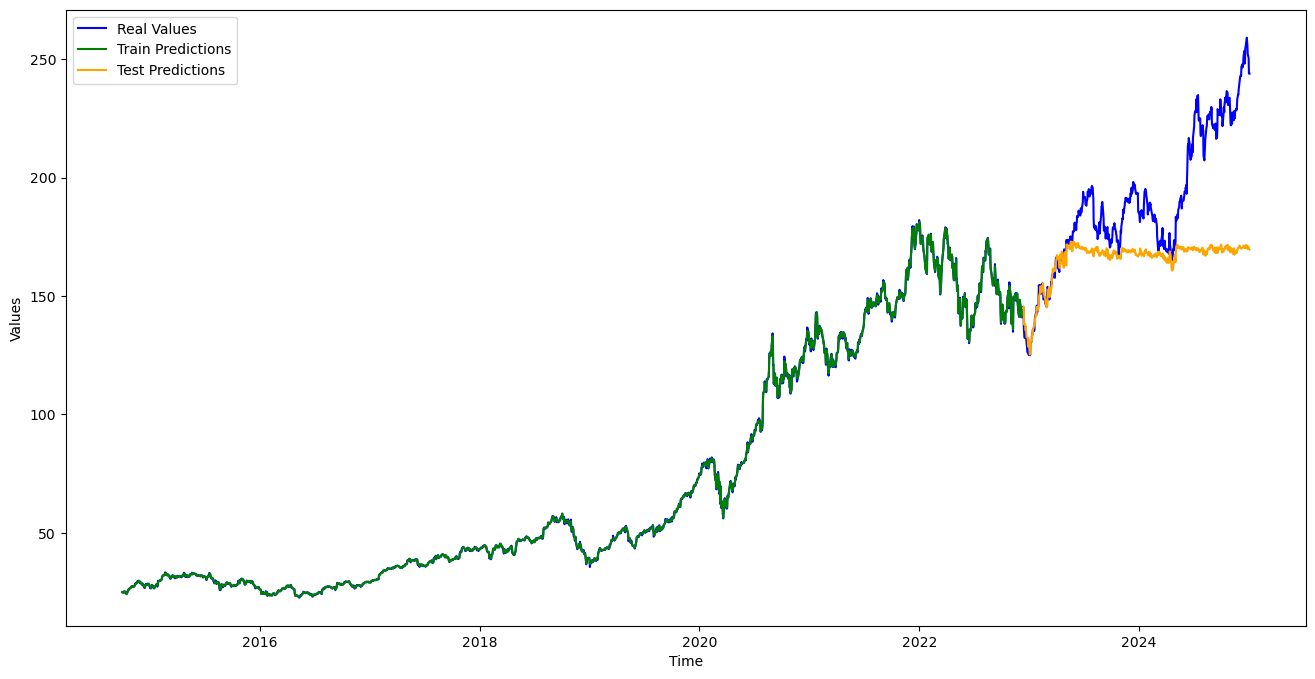

In [82]:
plot_predictions(target_linear_close, train_ClosePredictions['pred'], test_ClosePredictions['pred'], title="Close price predictions")

## Delta-close Predictions

In [83]:
model_delta.fit(
    X_train_linear, y_train_linear_delta,
    eval_set=[(X_test_linear, y_test_linear_close)],
    verbose=True
)

[0]	validation_0-rmse:190.93669
[1]	validation_0-rmse:190.94990
[2]	validation_0-rmse:190.94488
[3]	validation_0-rmse:190.95783
[4]	validation_0-rmse:190.97368
[5]	validation_0-rmse:190.99450
[6]	validation_0-rmse:191.03226
[7]	validation_0-rmse:191.06071
[8]	validation_0-rmse:191.07101
[9]	validation_0-rmse:191.08003
[10]	validation_0-rmse:191.09420


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
y_pred_TrainDelta = model_delta.predict(X_train_linear)
y_pred_TestDelta = model_delta.predict(X_test_linear)

In [89]:
train_DeltaPredictions = pd.DataFrame(y_train_linear_delta)
train_DeltaPredictions['pred'] = y_pred_TrainDelta
train_DeltaPredictions.index = pd.to_datetime(train_DeltaPredictions.index)

test_DeltaPredictions = pd.DataFrame(y_test_linear_delta)
test_DeltaPredictions['pred'] = y_pred_TestDelta
test_DeltaPredictions.index = pd.to_datetime(test_DeltaPredictions.index)

In [91]:
print("Model Delta-close Train Scores")
model_scores(train_DeltaPredictions['next_delta_close'], train_DeltaPredictions['pred'])

print("\nModel Delta-close Test Scores")
model_scores(test_DeltaPredictions['next_delta_close'], test_DeltaPredictions['pred'])

Model Delta-close Train Scores
MAE: 1.0119
RMSE: 1.7378
MAPE (%): 5045690942.7109
R²: 0.0051

Model Delta-close Test Scores
MAE: 1.9167
RMSE: 2.5832
MAPE (%): 8744835585.7326
R²: -0.0053


{'MAE': 1.916722790754221,
 'RMSE': 2.5831904302130333,
 'MAPE (%)': 8744835585.732637,
 'R²': -0.005322573269442854}

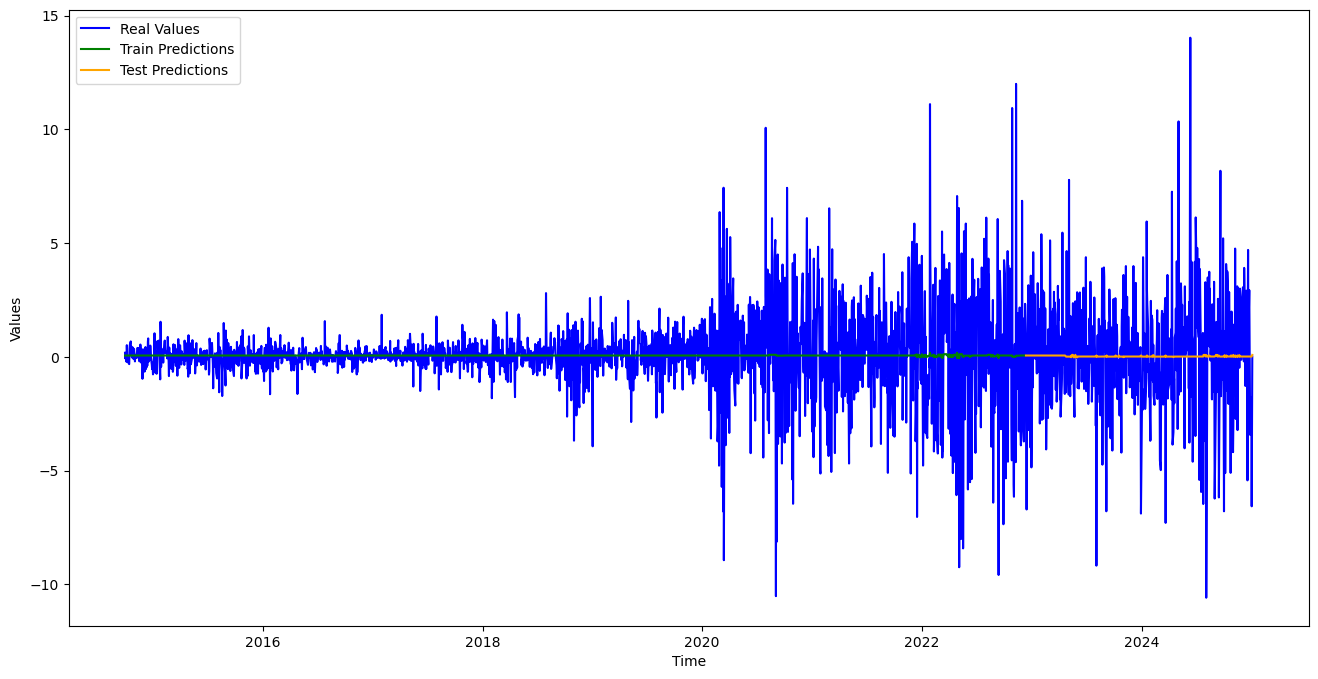

In [93]:
plot_predictions(target_linear_delta, train_DeltaPredictions['pred'], test_DeltaPredictions['pred'], title="Delta-close price predictions")

# LSTM Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

df = df.dropna()
target = df[['Close']]
input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

In [4]:
from sklearn.preprocessing import RobustScaler

X_Scaler = RobustScaler()
y_Scaler = RobustScaler()

X_input = X_Scaler.fit_transform(input)
y_close = y_Scaler.fit_transform(target)



In [ ]:
def create_time_windows(input, target, window_size=10):
    X = []
    y = []
    for i in range(len(input) - window_size):
        X.append(input[i:(i+window_size), :])
        y.append(target[i + window_size, 0])
    X = np.array(X)
    y = np.array(y)
    input_size = (X.shape[1], X.shape[2])
    return X, y, input_size

In [6]:
X, y, input_size = create_time_windows(X_input, y_close)
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

In [21]:
window_size = 10

train_dates_dataframe = target.iloc[:train_size, :]
test_dates_dataframe = target.iloc[(train_size+window_size):, :]
train_dates_dataframe

,Close
date,
2014-10-01,24.795000
2014-10-02,24.975000
2014-10-03,24.905001
2014-10-06,24.905001
2014-10-07,24.687500
...,...
2022-11-22,150.179993
2022-11-23,151.070007
2022-11-25,148.110001


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0183
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.3742e-04
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.3066e-04
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9525e-04
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1342e-04
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3120e-04
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8693e-04
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1184e-04
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3191e-04
Epoch 10/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9357e-04


In [22]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_dates_dataframe['pred'] = y_Scaler.inverse_transform(y_pred_train)
test_dates_dataframe['pred'] = y_Scaler.inverse_transform(y_pred_test)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_6228\904795612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dates_dataframe['pred'] = y_Scaler.inverse_transform(y_pred_train)
C:\Users\user\AppData\Local\Temp\ipykernel_6228\904795612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates_dataframe['pred'] = y_Scaler.inverse_transform(y_pred_test)


In [23]:
# Plotting Scores
print("Train-Set Score")
model_scores(train_dates_dataframe['Close'], train_dates_dataframe['pred'])

print("\nTest-Set Score")
model_scores(test_dates_dataframe['Close'], test_dates_dataframe['pred'])

Train-Set Score
MAE: 3.3138
RMSE: 5.0004
MAPE (%): 4.5291
R²: 0.9894

Test-Set Score
MAE: 9.1700
RMSE: 11.6589
MAPE (%): 4.4914
R²: 0.8373


{'MAE': 9.169982836084456,
 'RMSE': 11.658939893355027,
 'MAPE (%)': 4.491441003511251,
 'R²': 0.8372968704625753}

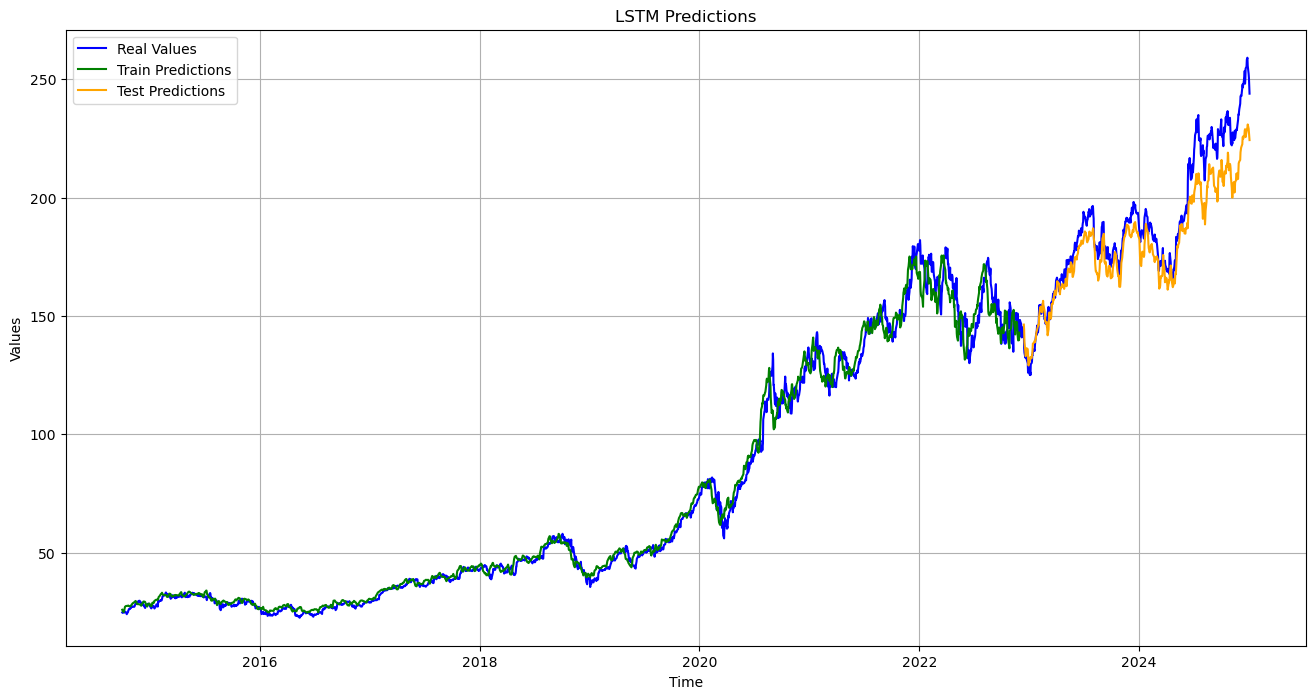

In [26]:
plot_predictions(target, train_dates_dataframe['pred'], test_dates_dataframe['pred'], title="LSTM Predictions")

# Trying different LSTM Models

## "window_size=20, full features"

In [11]:
import pandas as pd
import numpy as np
import ml_utils as mlu

In [14]:
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

df = df.dropna()
target = df[['Close']]
input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

In [15]:
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()

In [16]:
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input, scaled_target, window_size=20)

In [17]:
model1 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=[150,100,50],
                       dense_units=[50,25])


In [22]:
model1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test)
)

Epoch 1/20


256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0011 - val_loss: 0.0529
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 9.5297e-04 - val_loss: 0.0670
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0011 - val_loss: 0.0634
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 9.1478e-04 - val_loss: 0.0726
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 8.1191e-04 - val_loss: 0.0995
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0012 - val_loss: 0.0856
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 7.8715e-04 - val_loss: 0.0755
Epoch 8/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 7.3861e-04 - val_loss: 0.0918
Epoch 9/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 9.2366e-04 - val_loss: 0.0673
Epoch 10/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 8.9791e-04 - val_loss: 0.0857
Epoch 11/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 7.8859e-04 - val_loss: 0.0978
Epoch 12/20
256/256 

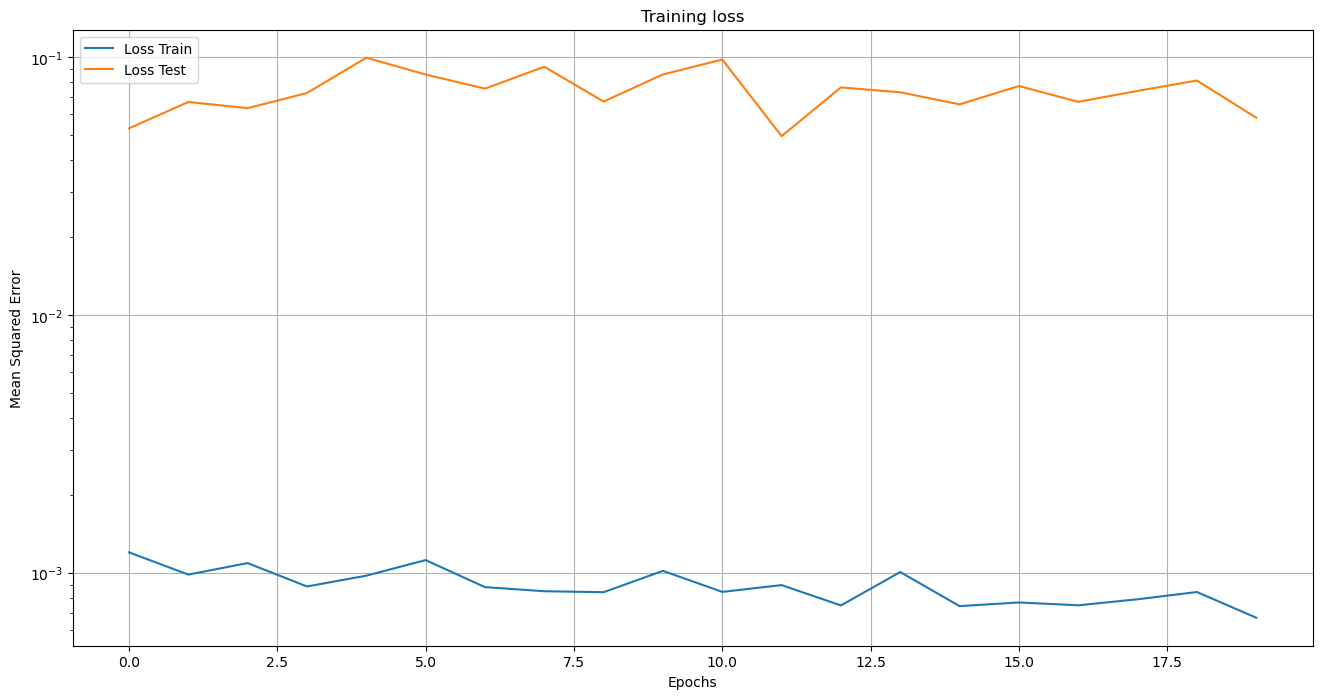

In [23]:
model1.plot_loss()

In [24]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\user\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\MaterialeTirocinio\Jupyter_lab_MyThings\Stock_prediction\ml_utils.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_results['pred'] = self.inverse_scale_output(y_train_pred)
c:\Users\user\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\MaterialeTirocinio\Jupyter_lab_MyThings\Stock_prediction\ml_utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['pred'] = self.inverse_scale_output(y_test_

Train-Set Score
MAE: 5.1981
RMSE: 6.8327
MAPE (%): 9.0565
R²: 0.9801

Test-Set Score
MAE: 17.7207
RMSE: 25.6437
MAPE (%): 8.2960
R²: 0.2071


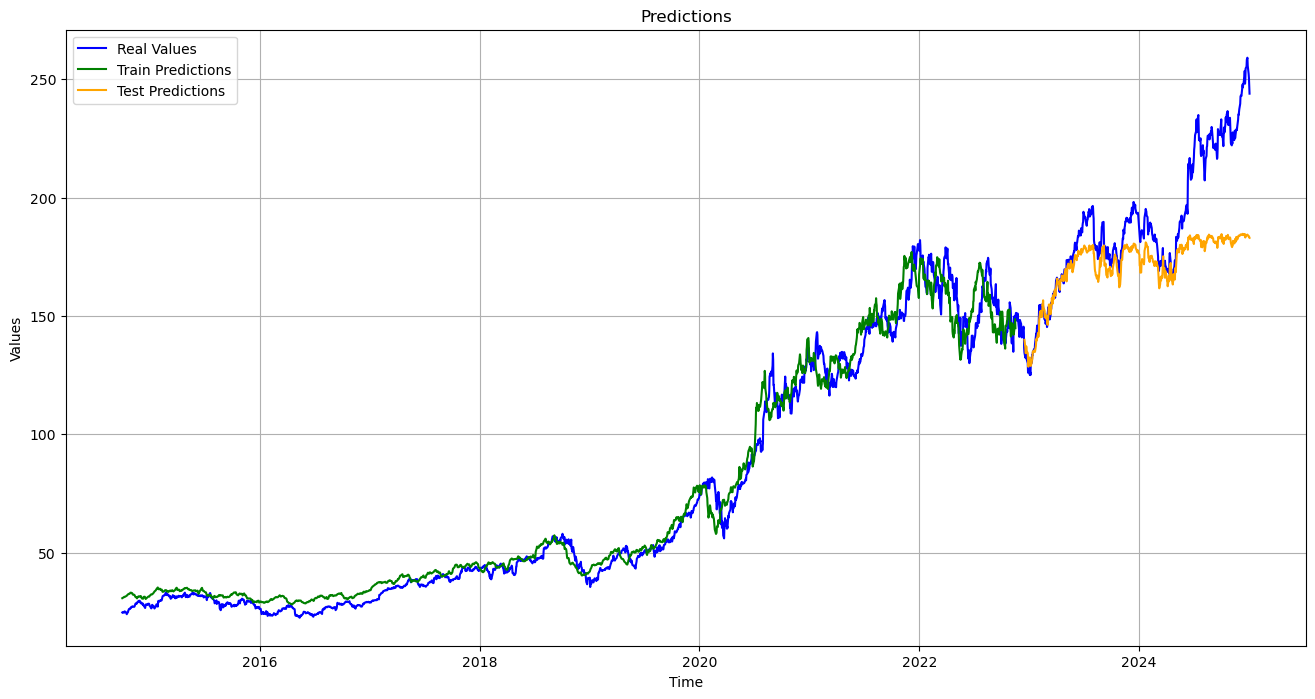

In [25]:
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=20)
data_scaler.print_scores()
data_scaler.plot_results()

## "window_size=5, full features" -> Good

In [1]:
import pandas as pd
import numpy as np
import ml_utils as mlu

df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

df = df.dropna()
target = df[['Close']]
input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

In [3]:
window_size = 5
lstm_units = [100, 50]
dense_units = [25]
dropout = 0.3


In [4]:
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()

X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input, scaled_target, window_size=window_size)

model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units)

model2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test)
)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0235 - val_loss: 0.0592
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0037 - val_loss: 0.0337
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0030 - val_loss: 0.0335
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0027 - val_loss: 0.0205
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - val_loss: 0.0372
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0019 - val_loss: 0.0315
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018 - val_loss: 0.0236
Epoch 8/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0018 - val_loss: 0.0204
Epoch 9/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0017 - val_loss: 0.0337
Epoch 10/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 11/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0016 - val_loss: 0.0264
Epoch 12/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

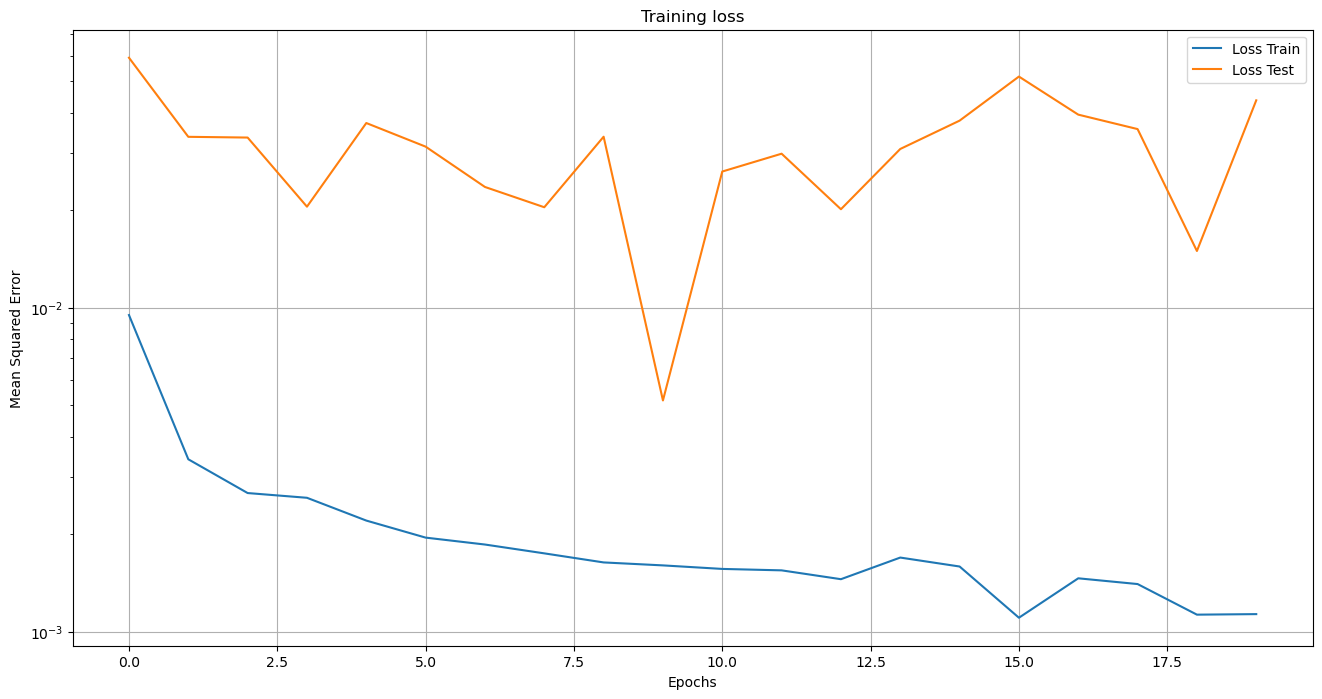

c:\Users\user\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\MaterialeTirocinio\Jupyter_lab_MyThings\Stock_prediction\ml_utils.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_results['pred'] = self.inverse_scale_output(y_train_pred)
c:\Users\user\OneDrive - Alma Mater Studiorum Università di Bologna\Desktop\MaterialeTirocinio\Jupyter_lab_MyThings\Stock_prediction\ml_utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['pred'] = self.inverse_scale_output(y_test_

Train-Set Score
MAE: 2.2809
RMSE: 3.3425
MAPE (%): 3.2541
R²: 0.9953

Test-Set Score
MAE: 5.7253
RMSE: 8.3046
MAPE (%): 2.7953
R²: 0.9176


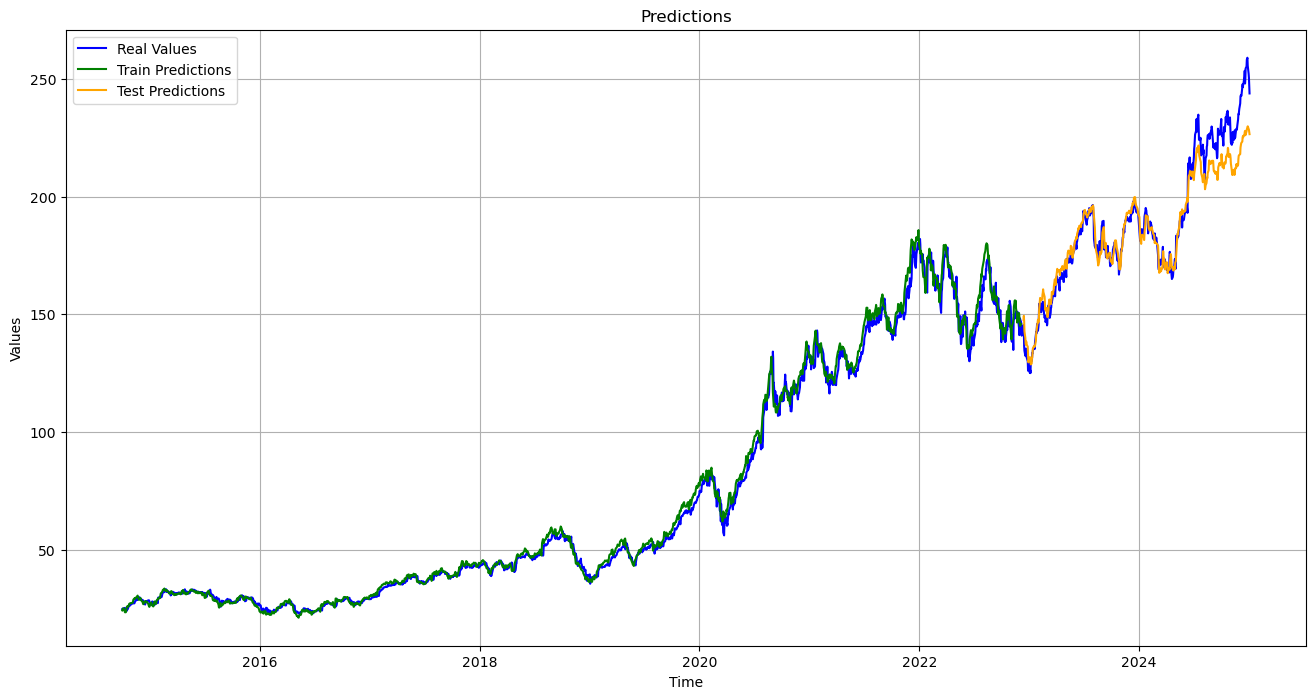

In [6]:
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()

## "window_size=5, full_features, more layers, dropout=0.3" -> Works better with less layers

In [9]:
window_size = 5
lstm_units = [150, 100, 50]
dense_units = [50, 25]
dropout = 0.3

epochs = 30
batch_size = 32

Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0799 - val_loss: 0.0883
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0056 - val_loss: 0.0610
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - val_loss: 0.0225
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0037 - val_loss: 0.0354
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - val_loss: 0.0495
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - val_loss: 0.0858
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 0.0776
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 0.0474
Epoch 9/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0939
Epoch 10/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - val_loss: 0.0704
Epoch 11/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019 - val_loss: 0.0476
Epoch 12/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

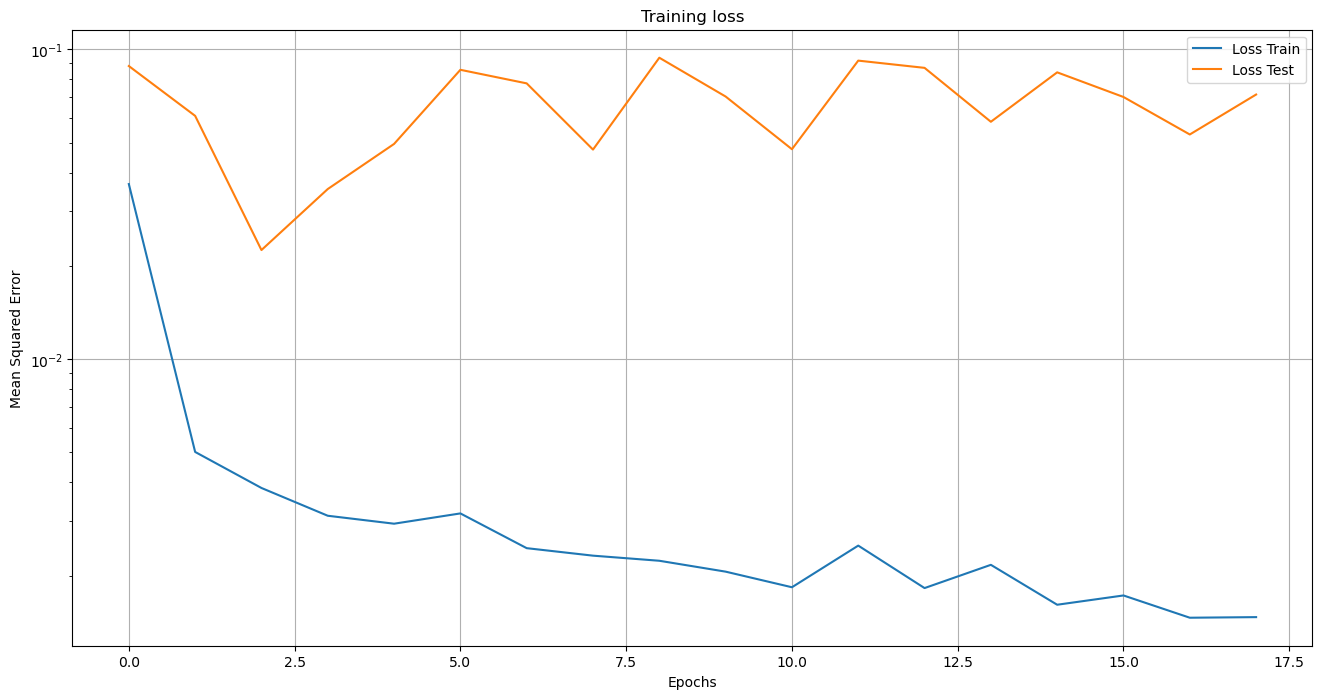

Train-Set Score
MAE: 2.2380
RMSE: 2.8963
MAPE (%): 4.2060
R²: 0.9965

Test-Set Score
MAE: 12.6461
RMSE: 17.3025
MAPE (%): 6.0694
R²: 0.6425


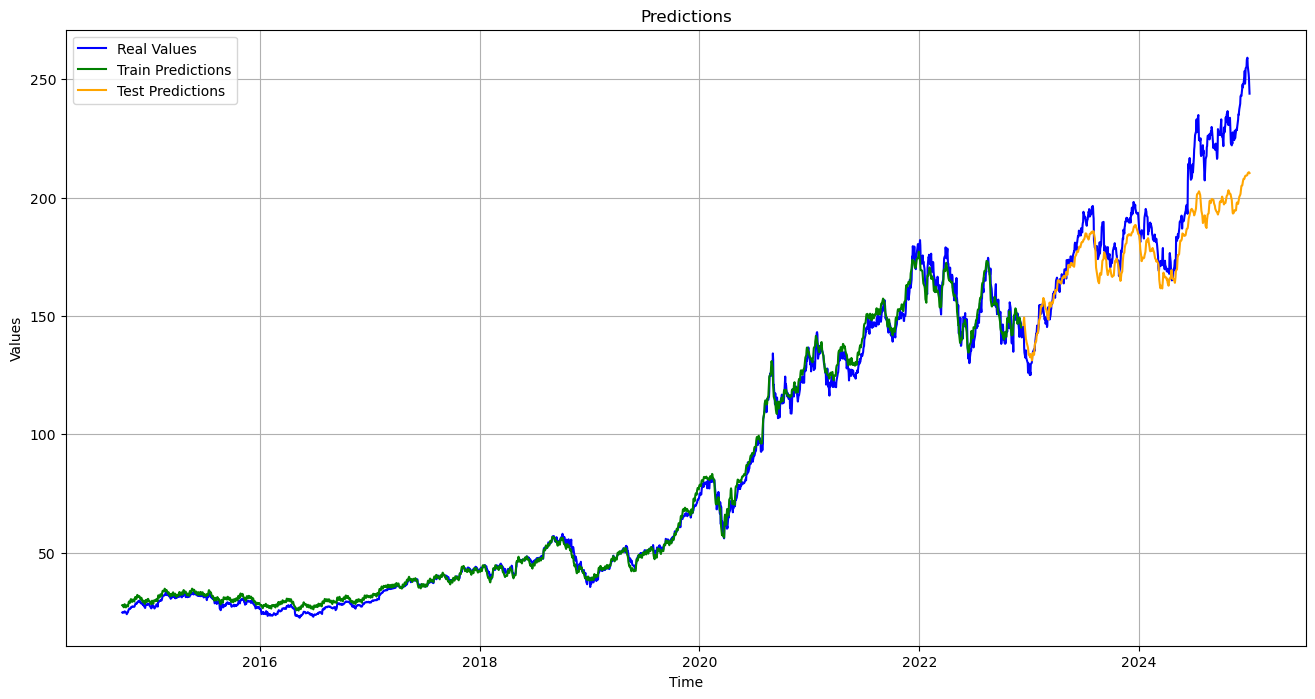

In [10]:
# Imports
import pandas as pd
import numpy as np
import ml_utils as mlu
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

# Selecting Features
df = df.dropna()
target = df[['Close']]
input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

# Preparing Data
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input,
                                                                                            scaled_target,
                                                                                            window_size=window_size)

# Creating Model
model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units,
                       dropout=dropout)

# Training Model
model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)

# Making Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Printing Results
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()

## Testing Hyperparameters

In [3]:
window_size = 5
lstm_units = [100, 100]
dense_units = [50]
dropout = 0

epochs = 100
batch_size = 8
set_early_stopping = True

Epoch 1/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0162 - val_loss: 0.0162
Epoch 2/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.6362e-04 - val_loss: 0.0175
Epoch 3/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.1370e-04 - val_loss: 0.0240
Epoch 4/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.9321e-04 - val_loss: 0.0065
Epoch 5/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.0226e-04 - val_loss: 0.0135
Epoch 6/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.2871e-04 - val_loss: 0.0031
Epoch 7/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.0107e-04 - val_loss: 0.0077
Epoch 8/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6460e-04 - val_loss: 0.0072
Epoch 9/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.8990e-04 - val_loss: 0.0047
Epoch 10/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.4272e-04 - val_loss: 0.0068
Epoch 11/100
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.0023e-04 - val_loss: 0.0065
E

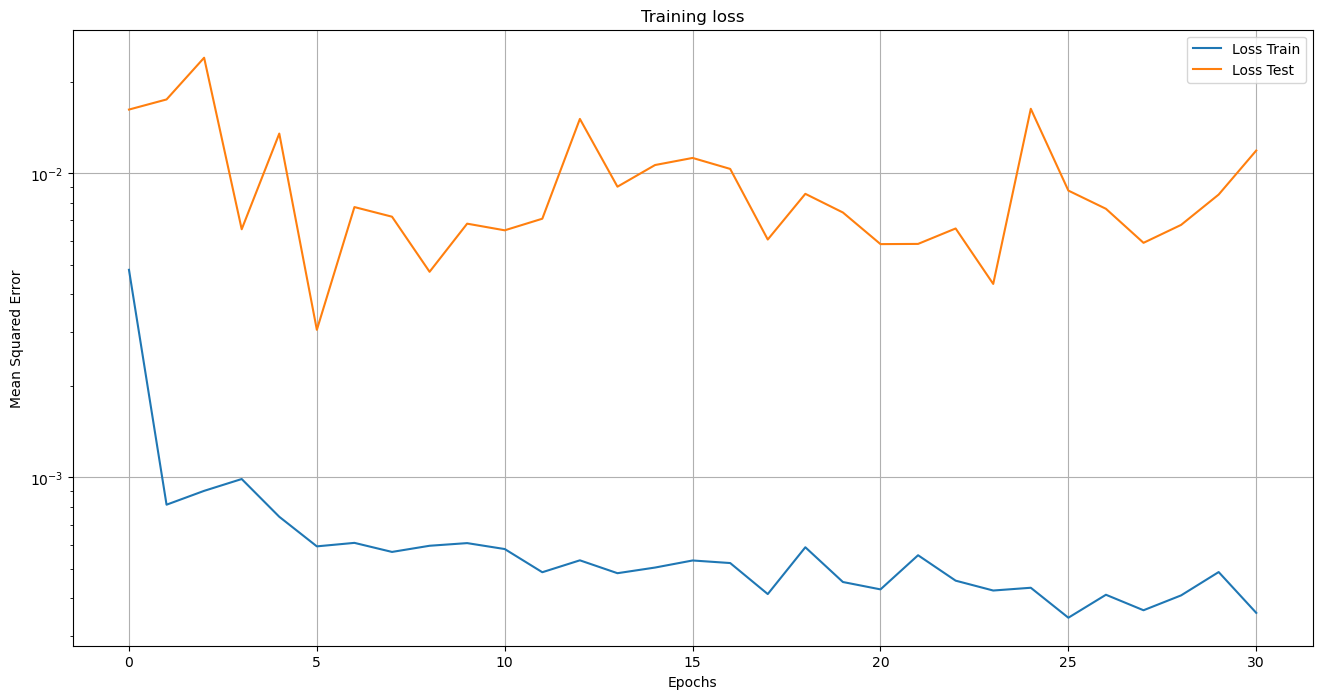

Train-Set Score
MAE: 3.4793
RMSE: 5.1561
MAPE (%): 3.9769
R²: 0.9914

Test-Set Score
MAE: 5.6600
RMSE: 6.3793
MAPE (%): 2.7608
R²: 0.9366


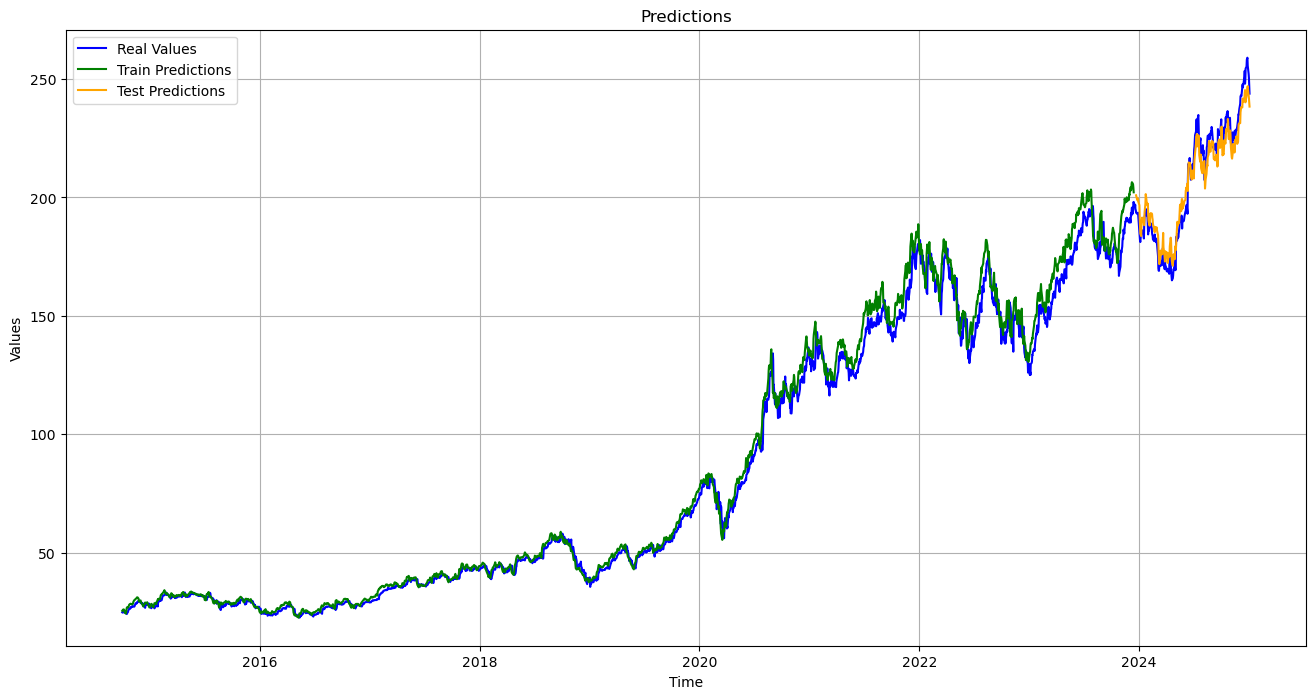

In [ ]:
# Imports
import pandas as pd
import numpy as np
import ml_utils as mlu
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

# Selecting Features
df = df.dropna()
target = df[['Close']]
input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
       'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

# Preparing Data
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input,
                                                                                            scaled_target,
                                                                                            window_size=window_size,
                                                                                            train_size_pct=0.8)

# Creating Model
model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units,
                       dropout=dropout)

# Training Model
model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    set_early_stopping=set_early_stopping,
    validation_data=(X_test, y_test)
)

# Making Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Printing Results
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()

## Testing features

In [13]:
window_size = 10
lstm_units = [100, 100]
dense_units = [50]
dropout = 0

epochs = 50
batch_size = 8
set_early_stopping = True

Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0117 - val_loss: 0.0096
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 0.0061
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.4745e-04 - val_loss: 0.0062
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.5089e-04 - val_loss: 0.0025
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.2111e-04 - val_loss: 0.0011
Epoch 8/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.4235e-04 - val_loss: 0.0020
Epoch 9/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.8865e-04 - val_loss: 0.0016
Epoch 10/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.8250e-04 - val_loss: 0.0019
Epoch 11/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.4691e-04 - val_loss: 5.9891e-04
Epoch 12/50
257/257

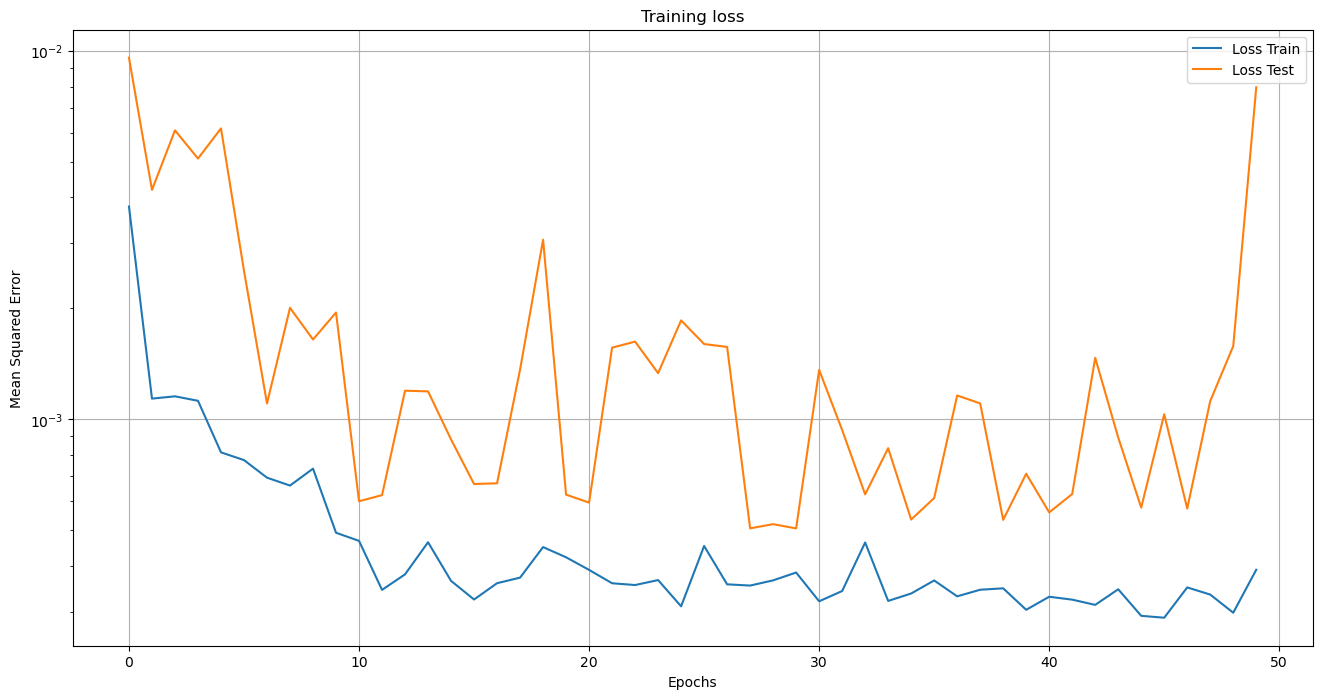

Train-Set Score
MAE: 3.1282
RMSE: 4.8407
MAPE (%): 4.1339
R²: 0.9901

Test-Set Score
MAE: 1.9191
RMSE: 2.5933
MAPE (%): 1.0317
R²: 0.9920


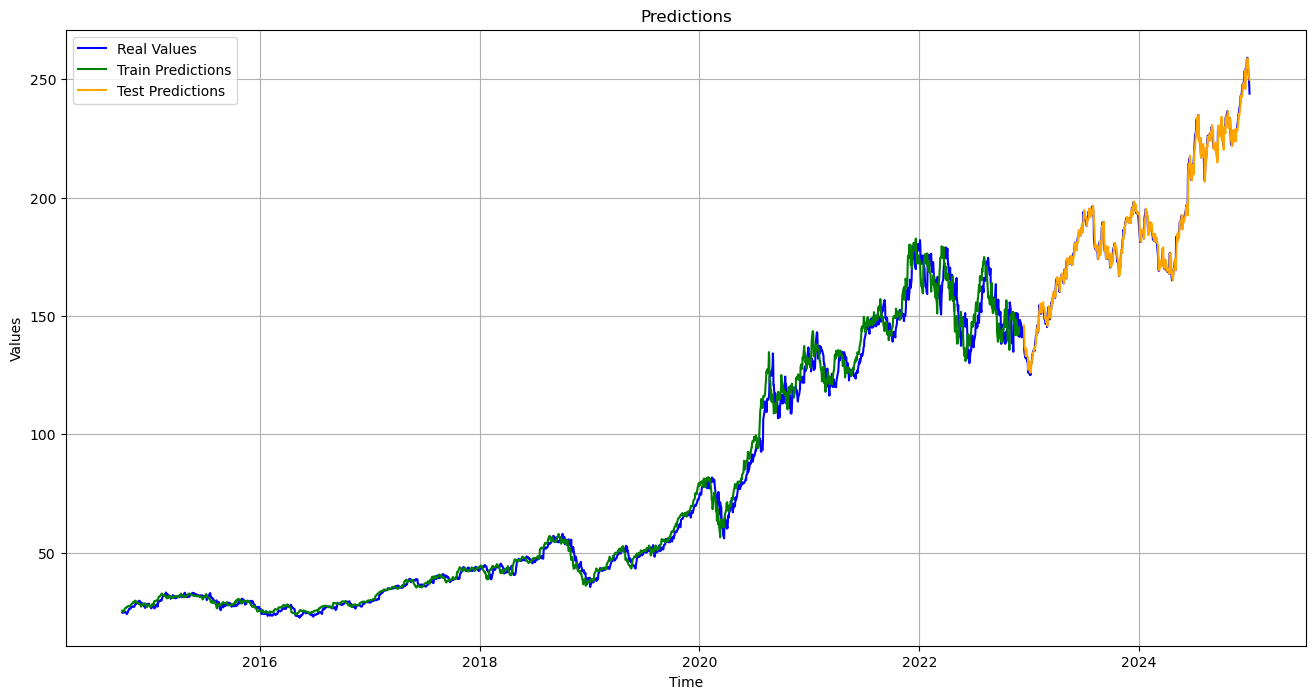

In [14]:
# Imports
import pandas as pd
import numpy as np
import ml_utils as mlu
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)

# Selecting Features
df = df.dropna()
target = df[['Close']]
input = df[['Close']]

# input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
#        'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
#        'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

# Preparing Data
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input,
                                                                                            scaled_target,
                                                                                            window_size=window_size,
                                                                                            train_size_pct=0.8)

# Creating Model
model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units,
                       dropout=dropout)

# Training Model
model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    set_early_stopping=set_early_stopping,
    validation_data=(X_test, y_test)
)

# Making Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Printing Results
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()